# Finance Data Project 

### In this data project we will focus on exploratory data analysis of stock prices. This project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
#### NOTE: This project will introduce a lot of new concepts and have you looking things up on your own to try to solve the tasks issued.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from the Web using pandas!

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**)

### The Imports

In [90]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import os
%matplotlib inline

## Data

### We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:
    
    # Bank of America
    BAC = data.DataReader("BAC", 'quandl', start, end)

#### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "quandl" MAY NOT ALWAYS WORK. 
------------

In [91]:
start = datetime.datetime(2006, 1,1)
end = datetime.datetime(2016,1,1)
BAC = data.DataReader('BAC', 'quandl', api_key = 'nX9_F-2aDgV6GgasFPLQ', start = start ,end = end)
C = data.DataReader('C', 'quandl', api_key = 'nX9_F-2aDgV6GgasFPLQ', start = start, end = end)
GS = data.DataReader('GS', 'quandl', api_key = 'nX9_F-2aDgV6GgasFPLQ', start = start, end = end)
JPM = data.DataReader('JPM', 'quandl', api_key = 'nX9_F-2aDgV6GgasFPLQ', start = start, end = end)
MS = data.DataReader('MS', 'quandl', api_key = 'nX9_F-2aDgV6GgasFPLQ',start = start, end = end)
WFC = data.DataReader('WFC', 'quandl', api_key = 'nX9_F-2aDgV6GgasFPLQ',start = start, end = end)

In [92]:
BAC.head(), C.head(), GS.head(), JPM.head(), MS.head(), WFC.head()

(             Open   High    Low  Close      Volume  ExDividend  SplitRatio  \
 Date                                                                         
 2015-12-31  17.01  17.07  16.83  16.83  47106760.0         0.0         1.0   
 2015-12-30  17.20  17.24  17.04  17.05  35035518.0         0.0         1.0   
 2015-12-29  17.25  17.35  17.16  17.28  45628449.0         0.0         1.0   
 2015-12-28  17.22  17.23  16.98  17.13  41759993.0         0.0         1.0   
 2015-12-24  17.32  17.38  17.22  17.27  29373415.0         0.0         1.0   
 
               AdjOpen    AdjHigh     AdjLow   AdjClose   AdjVolume  
 Date                                                                
 2015-12-31  16.564256  16.622684  16.388973  16.388973  47106760.0  
 2015-12-30  16.749277  16.788229  16.593470  16.603208  35035518.0  
 2015-12-29  16.797967  16.895347  16.710326  16.827181  45628449.0  
 2015-12-28  16.768753  16.778491  16.535042  16.681112  41759993.0  
 2015-12-24  16.866133  1

In [93]:
BAC.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-12-31,17.01,17.07,16.83,16.83,47106760.0,0.0,1.0,16.564256,16.622684,16.388973,16.388973,47106760.0
2015-12-30,17.20,17.24,17.04,17.05,35035518.0,0.0,1.0,16.749277,16.788229,16.593470,16.603208,35035518.0
2015-12-29,17.25,17.35,17.16,17.28,45628449.0,0.0,1.0,16.797967,16.895347,16.710326,16.827181,45628449.0
2015-12-28,17.22,17.23,16.98,17.13,41759993.0,0.0,1.0,16.768753,16.778491,16.535042,16.681112,41759993.0
2015-12-24,17.32,17.38,17.22,17.27,29373415.0,0.0,1.0,16.866133,16.924561,16.768753,16.817443,29373415.0


#### Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [94]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

#### Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [95]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], keys=tickers, axis = 1)

#### Set the column name levels (this is filled out for you):

In [96]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [97]:
bank_stocks.head()

Bank Ticker    BAC                                                         \
Stock Info    Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                        
2015-12-31   17.01  17.07  16.83  16.83  47106760.0        0.0        1.0   
2015-12-30   17.20  17.24  17.04  17.05  35035518.0        0.0        1.0   
2015-12-29   17.25  17.35  17.16  17.28  45628449.0        0.0        1.0   
2015-12-28   17.22  17.23  16.98  17.13  41759993.0        0.0        1.0   
2015-12-24   17.32  17.38  17.22  17.27  29373415.0        0.0        1.0   

Bank Ticker                                   ...     WFC                     \
Stock Info     AdjOpen    AdjHigh     AdjLow  ...     Low  Close      Volume   
Date                                          ...                              
2015-12-31   16.564256  16.622684  16.388973  ...  54.220  54.36  10929420.0   
2015-12-30   16.749277  16.788229  16.593470  ...  54.794  54.89   8016893.0   
2015-12-29   16.797967  16.895347  16.710326  ...  54.990  55.29   7894876.0   
2015-12-28   16.768753  16.778491  16.535042  ...  54.170  54.68   8288759.0   
2015-12-24   16.866133  16.924561  16.768753  ...  54.710  54.82   4999417.0   

Bank Ticker                                                                    \
Stock Info  ExDividend SplitRatio    AdjOpen    AdjHigh     AdjLow   AdjClose   
Date                                                                            
2015-12-31         0.0        1.0  51.350518  51.764921  51.077327  51.209212   
2015-12-30         0.0        1.0  52.066467  52.104149  51.618057  51.708493   
2015-12-29         0.0        1.0  51.915741  52.141830  51.802696  52.085308   
2015-12-28         0.0        1.0  51.388199  51.604868  51.030225  51.510664   
2015-12-24         0.0        1.0  51.783856  51.896900  51.538926  51.642550   

Bank Ticker              
Stock Info    AdjVolume  
Date                     
2015-12-31   10929420.0  
2015-12-30    8016893.0  
2015-12-29    7894876.0  
2015-12-28    8288759.0  
2015-12-24    4999417.0  

[5 rows x 72 columns]

#### Check the head of the bank_stocks dataframe.

In [98]:
bank_stocks.drop(labels=['ExDividend','SplitRatio','AdjOpen','AdjHigh','AdjLow','AdjVolume','AdjClose'], axis = 1, level = 'Stock Info')

Bank Ticker    BAC                                       C                \
Stock Info    Open   High    Low  Close      Volume   Open   High    Low   
Date                                                                       
2015-12-31   17.01  17.07  16.83  16.83  47106760.0  52.07  52.39  51.75   
2015-12-30   17.20  17.24  17.04  17.05  35035518.0  52.84  52.94  52.25   
2015-12-29   17.25  17.35  17.16  17.28  45628449.0  52.76  53.22  52.74   
2015-12-28   17.22  17.23  16.98  17.13  41759993.0  52.57  52.57  51.96   
2015-12-24   17.32  17.38  17.22  17.27  29373415.0  52.48  52.97  52.45   
...            ...    ...    ...    ...         ...    ...    ...    ...   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0  48.60  48.74  48.30   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0  48.88  48.90  48.20   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0  48.44  48.78  48.40   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0  48.86  49.10  48.35   
2006-01-03   46.92  47.18  46.15  47.08  16296700.0  49.00  49.38  48.11   

Bank Ticker                     ...     MS                           \
Stock Info   Close      Volume  ...   Open     High      Low  Close   
Date                            ...                                   
2015-12-31   51.75  11274831.0  ...  31.91  32.3000  31.7700  31.81   
2015-12-30   52.30   8763137.0  ...  32.50  32.6450  32.2000  32.23   
2015-12-29   52.98  10153534.0  ...  32.44  32.7016  32.3250  32.55   
2015-12-28   52.38   8760444.0  ...  32.36  32.3600  31.9500  32.17   
2015-12-24   52.71   4671254.0  ...  32.57  32.7100  32.4400  32.48   
...            ...         ...  ...    ...      ...      ...    ...   
2006-01-09   48.39  16807000.0  ...  58.63  59.2900  58.6244  59.19   
2006-01-06   48.62  13702000.0  ...  58.77  58.8500  58.0500  58.57   
2006-01-05   48.62  11431000.0  ...  58.55  58.5900  58.0200  58.51   
2006-01-04   48.38  18709000.0  ...  58.70  59.2800  58.3500  58.35   
2006-01-03   49.29  15376000.0  ...  57.17  58.4900  56.7400  58.31   

Bank Ticker               WFC                                      
Stock Info      Volume   Open     High     Low  Close      Volume  
Date                                                               
2015-12-31   8149307.0  54.51  54.9499  54.220  54.36  10929420.0  
2015-12-30   5057162.0  55.27  55.3100  54.794  54.89   8016893.0  
2015-12-29   6388244.0  55.11  55.3500  54.990  55.29   7894876.0  
2015-12-28   5420280.0  54.55  54.7800  54.170  54.68   8288759.0  
2015-12-24   2798163.0  54.97  55.0900  54.710  54.82   4999417.0  
...                ...    ...      ...     ...    ...         ...  
2006-01-09   4144500.0  63.35  63.6500  63.110  63.35   2809800.0  
2006-01-06   6889800.0  63.16  63.5500  62.770  63.36   4201900.0  
2006-01-05   5778000.0  63.00  63.1100  62.620  62.99   5079000.0  
2006-01-04   7977800.0  63.60  63.6400  62.730  63.06   5435000.0  
2006-01-03   5377000.0  63.20  63.9500  62.390  63.80   5508200.0  

[2517 rows x 30 columns]

# EDA

### Let's explore the data a bit! Use [ .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

#### What is the max Close price for each bank's stock throughout the time period?

In [99]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64


#### Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [100]:
returns = pd.DataFrame()

#### Use pandas pct_change() method on the Close column to create a column representing this return value. Create a column using this return value.

In [101]:
for i in tickers:
    returns[i + 'Return'] = bank_stocks[i]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-30,0.013072,0.010628,0.009876,0.008481,0.013203,0.009750
2015-12-29,0.013490,0.013002,0.008351,0.007208,0.009929,0.007287
2015-12-28,-0.008681,-0.011325,-0.010407,-0.010288,-0.011674,-0.011033
2015-12-24,0.008173,0.006300,0.004680,0.003314,0.009636,0.002560


#### Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

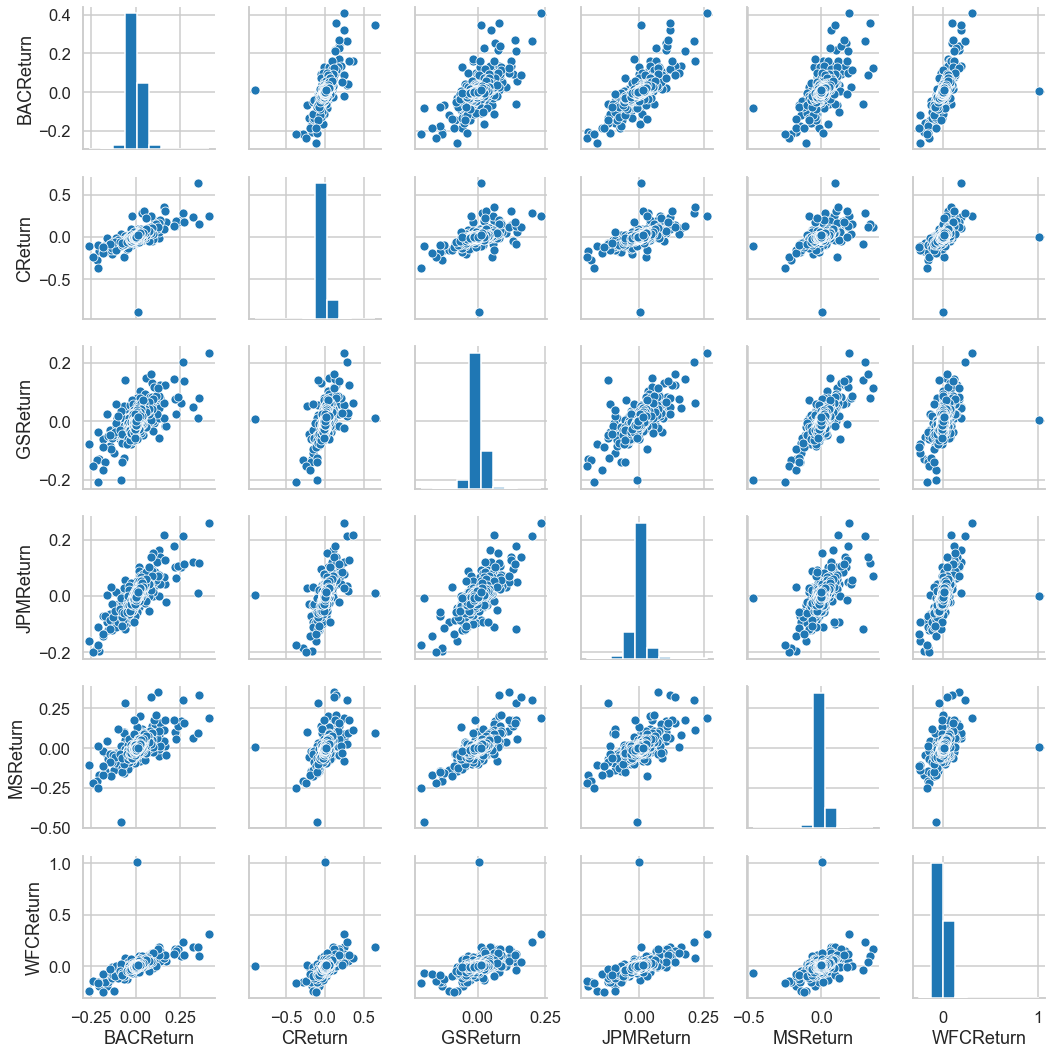

In [102]:
import seaborn as sns
sns.set_context('talk')
sns.pairplot(data = returns[1:])
plt.tight_layout()

#### Notice something strange about Citigroup behavior...

#### Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Notice the pattern.

In [103]:
returns.idxmin()

BACReturn   2009-04-08
CReturn     2011-05-06
GSReturn    2008-11-21
JPMReturn   2009-01-20
MSReturn    2008-10-10
WFCReturn   2008-07-15
dtype: datetime64[ns]

#### You should have noticed that a bank's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame? 

In [104]:
returns.idxmax()

BACReturn   2009-01-16
CReturn     2009-02-26
GSReturn    2009-01-16
JPMReturn   2009-01-16
MSReturn    2008-10-08
WFCReturn   2006-08-11
dtype: datetime64[ns]

#### Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [105]:
returns.std()

BACReturn    0.037062
CReturn      0.043327
GSReturn     0.025155
JPMReturn    0.027392
MSReturn     0.035599
WFCReturn    0.035655
dtype: float64

#### Citigroup is the riskiest due to the high standard deviation value

In [107]:
w = returns.loc[datetime.datetime(2015,12,31):datetime.datetime(2015,1,1)]
w.std()

BACReturn    0.016216
CReturn      0.015376
GSReturn     0.014152
JPMReturn    0.014088
MSReturn     0.016353
WFCReturn    0.012650
dtype: float64

#### Create a distplot using seaborn of the 2015 returns for Morgan Stanley

<AxesSubplot:xlabel='MSReturn'>

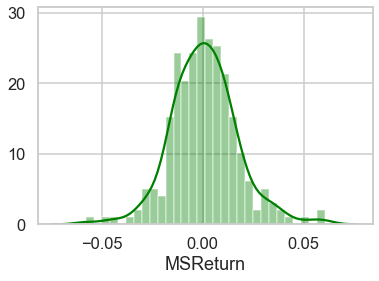

In [108]:
sns.distplot(w['MSReturn'],color = 'green',bins = 30)

#### Create a distplot using seaborn of the 2008 returns for CitiGroup 

<AxesSubplot:xlabel='CReturn'>

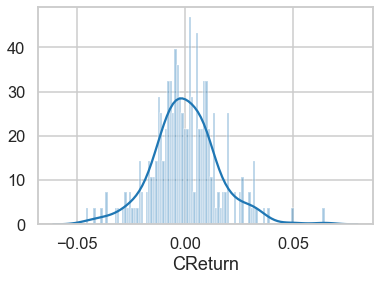

In [109]:
sns.distplot(returns.loc[datetime.datetime(2015,12,31):datetime.datetime(2015,1,1)]['CReturn'],bins = 100)


____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

#### Create a line plot showing Close price for each bank for the entire index of time

##### Using for loop

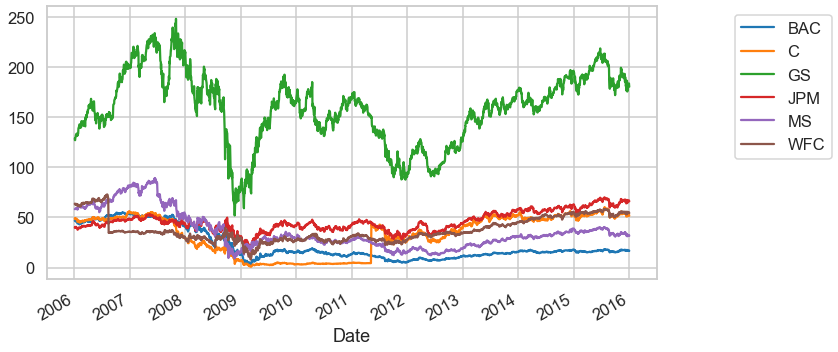

In [111]:
for i in tickers:
    bank_stocks[i]['Close'].plot(figsize = (12,5), label = i)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.3,1.0))
plt.tight_layout()

##### Using '.xs' 

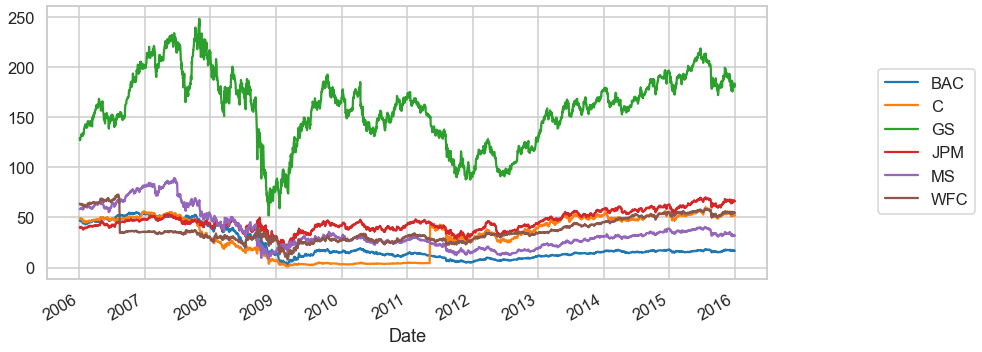

In [112]:
bank_stocks.xs('Close', axis = 1,level = 'Stock Info').plot(figsize = (14,5))
plt.legend(loc = 'upper right',bbox_to_anchor = (1.3,0.8))
plt.tight_layout()

##### Using Cufflinks iplot

In [113]:
bank_stocks.xs('Close', axis = 1,level = 'Stock Info').iplot()
#plt.legend(loc = 'upper right',bbox_to_anchor = (1.2,0.8))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

#### Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

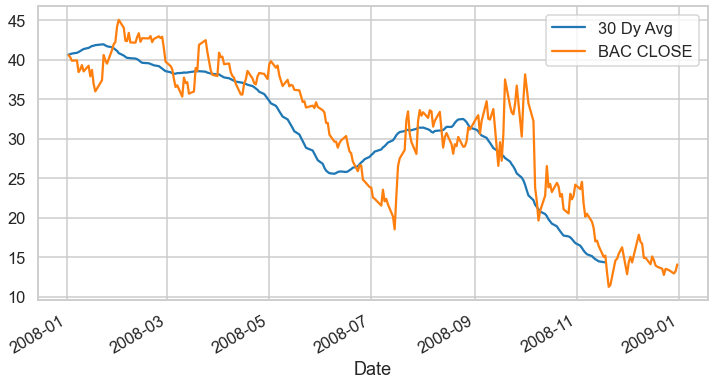

In [79]:
plt.figure(figsize = (12,6))
BAC['Close'].loc[datetime.datetime(2009,1,1):datetime.datetime(2008,1,1)].rolling(window = 30).mean().plot(label = '30 Dy Avg')
BAC['Close'].loc[datetime.datetime(2009,1,1):datetime.datetime(2008,1,1)].plot(label = 'BAC CLOSE')
plt.legend()

#### Create a heatmap of the correlation between the stocks Close Price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

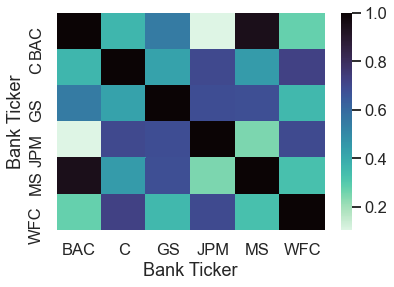

In [114]:
sns.heatmap(bank_stocks.xs('Close',axis = 1, level = 'Stock Info').corr(), cmap = 'mako_r')

#### Use seaborn's clustermap to cluster the correlations together:

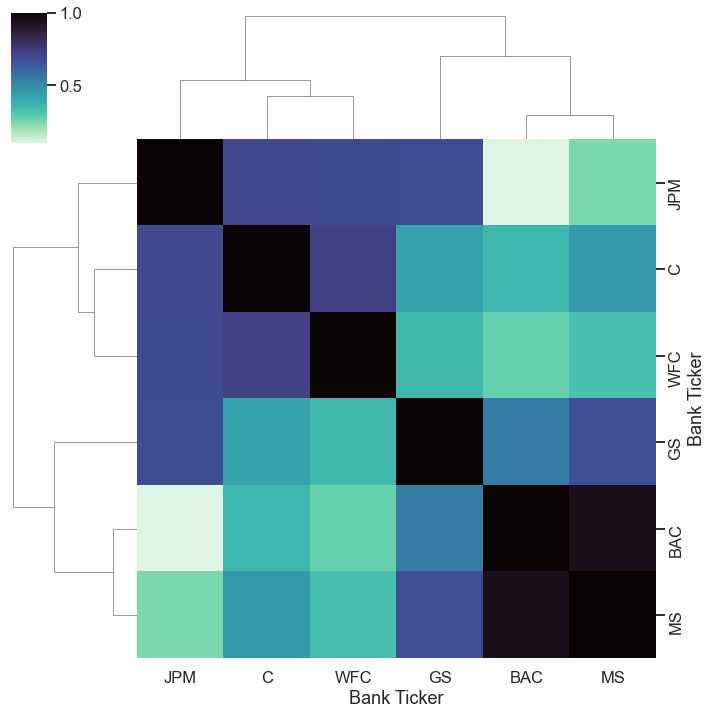

In [115]:
sns.clustermap(bank_stocks.xs('Close',axis = 1, level = 'Stock Info').corr(), cmap = 'mako_r')

In [116]:
bank_stocks.xs('Close',axis = 1, level = 'Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.363303,0.550936,0.103855,0.944219,0.276687
C,0.363303,1.000000,0.426868,0.700735,0.449794,0.723474
GS,0.550936,0.426868,1.000000,0.685347,0.683830,0.359021
JPM,0.103855,0.700735,0.685347,1.000000,0.250410,0.697574
MS,0.944219,0.449794,0.683830,0.250410,1.000000,0.331510
WFC,0.276687,0.723474,0.359021,0.697574,0.331510,1.000000


## Part 2
In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

#### Use .iplot(kind='candle') to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [117]:
BAC.loc[datetime.datetime(2016,1,1):datetime.datetime(2015,1,1)].iplot(kind = 'candle')

#### Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [118]:
MS['Close'].loc[datetime.datetime(2016,1,1):datetime.datetime(2015,1,1)].ta_plot(study = 'sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [119]:
BAC['Close'].loc[datetime.datetime(2016,1,1):datetime.datetime(2015,1,1)].ta_plot(study = 'boll')

# Great Job!
